In [59]:
# Importing dataset
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Importing Dataset

In [2]:
df = pd.read_csv("Social_Network_Ads.csv")

# About the Dataset

The Dataset used in these models tells about whether a person of certain age having certain income purchases a product or not.
We need to predict whether a targeted audience will purchase the product or not.

<h5>It has two features.</h5>

--------> Age

--------> Estimated Salary

In [3]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


# Getting information about dataset

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [25]:
df.index

RangeIndex(start=0, stop=400, step=1)

In [26]:
df.columns

Index(['Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [28]:
df.corr()

,Age,EstimatedSalary,Purchased
Age,1.000000,0.155238,0.622454
EstimatedSalary,0.155238,1.000000,0.362083
Purchased,0.622454,0.362083,1.000000


# Checking null values

In [27]:
df.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

# Visulaizing the dataset

C:\Users\om123\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


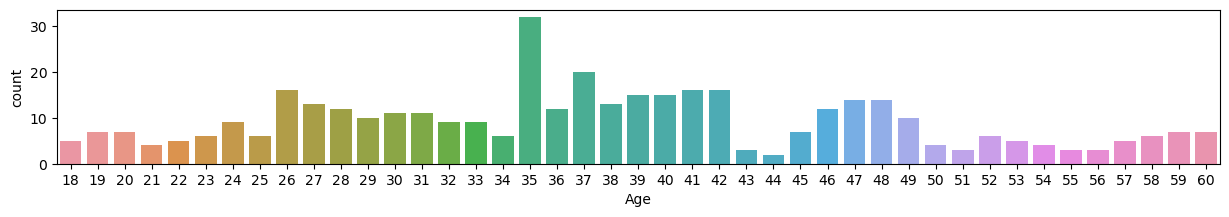

In [38]:
plt.figure(figsize=(15,2))
sns.countplot(df["Age"],data =df)
plt.show()

<AxesSubplot:xlabel='Age', ylabel='EstimatedSalary'>

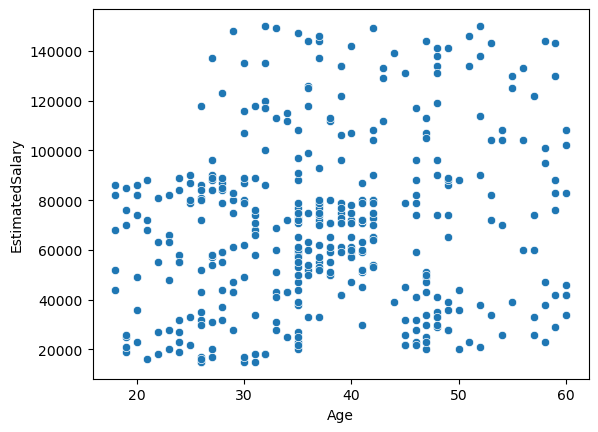

In [40]:
sns.scatterplot(data = df,x = df["Age"],y = df["EstimatedSalary"])

<h3>Thus, from above visulaization we can say that there is linear independency among the variables.</h3>

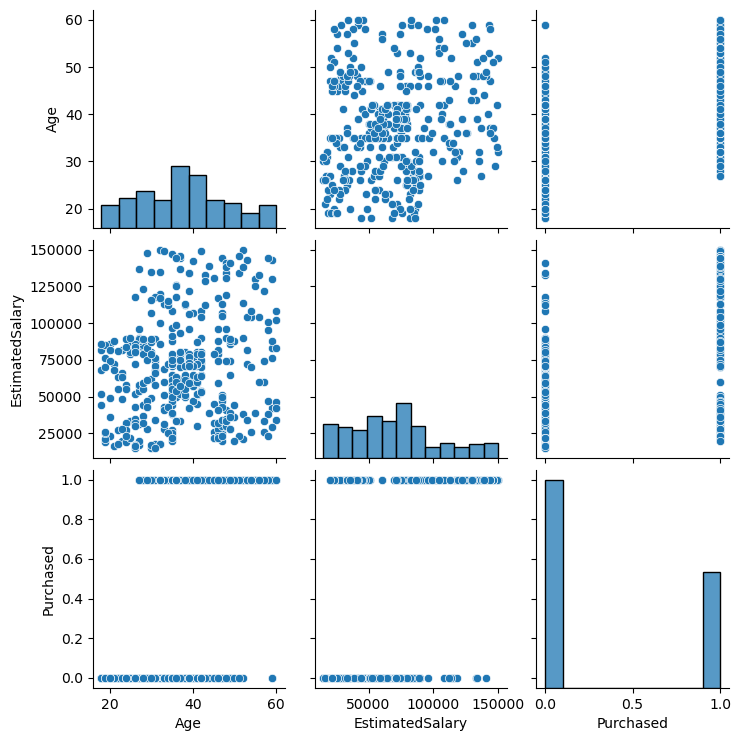

In [23]:
sns.pairplot(data=df)

# Splitting the dependent variable and independent variabe

In [5]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

# Splitting the dataset into two: training and test dataset

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
 x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

<h3> Applying normalization into "x_train" and "x_test" with the help of Standard Scaler method.</h3>

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
sc = StandardScaler()

In [10]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

<h3>Note: We are applying standard Scaler method in x_train dataset that's  why we call "fit_transform" method and we are converting 'x_test' into trained model that's why we call "transform" method.</h3>


--------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Building Logistic Regression Model

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
classifier = LogisticRegression()

<h3>Training the model by using fit method</h3>

In [15]:
classifier.fit(x_train, y_train)

LogisticRegression()

<h3>Predicting the output</h3>

In [47]:
y_pred = classifier.predict(x_test)

In [48]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1], dtype=int64)

In [18]:
classifier.predict(sc.transform([[30,65000]]))

array([0], dtype=int64)

In [19]:
classifier.predict(sc.transform([[40,65000]]))

array([0], dtype=int64)

In [20]:
classifier.predict(sc.transform([[40,85000]]))

array([0], dtype=int64)

In [21]:
classifier.predict(sc.transform([[50,100000]]))

array([1], dtype=int64)

<h3>Checking the accuracy level of our model</h3>

In [41]:
classifier.score(x_test, y_test)

0.925

# Confusion Matrix

<h3>We generally use confusion matrix to find number of correct and incorrect predictions that our model made.</h3>

In [46]:
from sklearn.metrics import confusion_matrix

In [55]:
confusion_matrix(y_test, y_pred)

array([[57,  1],
       [ 5, 17]], dtype=int64)

<h3>Visualizing the Training dataset</h3>

In [57]:
from matplotlib.colors import ListedColormap

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


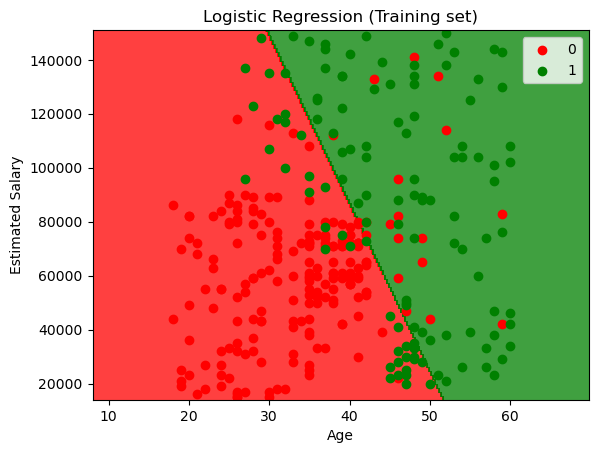

In [65]:
x_set, y_set = sc.inverse_transform(x_train), y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:,0].min() - 10,stop = x_set[:,0].max() + 10, step = 0.25),
                    np.arange(start = x_set[:,1].min() - 1000,stop = x_set[:,1].max() +1000, step = 0.25))

plt.contourf(x1, x2, classifier.predict(sc.transform(np.array([x1.ravel(), x2.ravel()]).T)).reshape(x1.shape),
             alpha =0.75, cmap = ListedColormap(('red','green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c = ListedColormap(("red","green"))(i), label = j)
plt.title("Logistic Regression (Training set)")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()
plt.show()

<h3>Visualizing the Test dataset</h3>

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


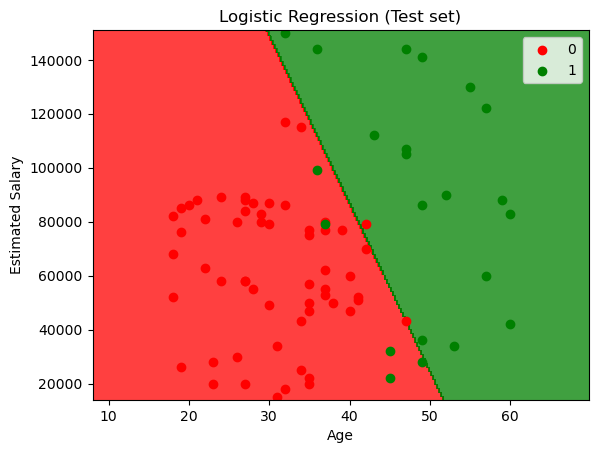

In [67]:
x_set, y_set = sc.inverse_transform(x_test), y_test
x1, x2 = np.meshgrid(np.arange(start = x_set[:,0].min() - 10,stop = x_set[:,0].max() + 10, step = 0.25),
                    np.arange(start = x_set[:,1].min() - 1000,stop = x_set[:,1].max() +1000, step = 0.25))

plt.contourf(x1, x2, classifier.predict(sc.transform(np.array([x1.ravel(), x2.ravel()]).T)).reshape(x1.shape),
             alpha =0.75, cmap = ListedColormap(('red','green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c = ListedColormap(("red","green"))(i), label = j)
plt.title("Logistic Regression (Test set)")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()
plt.show()